In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , f1_score
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB ,MultinomialNB

In [266]:
df = pd.read_csv('/content/churn_Dataset.csv')

In [267]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [268]:
df.shape

(7043, 21)

In [269]:
df['SeniorCitizen'].unique()

array([0, 1])

## train/test split

In [270]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [271]:
x_train , x_test , y_train , y_test = train_test_split(X , y , shuffle=True , test_size=0.2 , random_state=40, stratify=y)

## preprocessing Training data

In [272]:
x_train.shape

(5634, 20)

In [273]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 6754 to 6750
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

In [274]:
x_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2324,2774-LVQUS,Female,1,Yes,No,15,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,83.05,1258.3
5029,1848-LBZHY,Female,0,Yes,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.30,355.1
7014,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,3645.75
1222,9091-WTUUY,Male,0,Yes,Yes,64,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Mailed check,69.25,4447.75


In [275]:
# convert TatalCharges  column to numeric
x_train['TotalCharges'].dtype

dtype('O')

In [276]:
x_train['TotalCharges'] = pd.to_numeric(x_train['TotalCharges'], errors='coerce')

In [277]:
# check null values after conversion
x_train.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

<ipython-input-278-ed0a236a5678>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['TotalCharges'],hist=False)


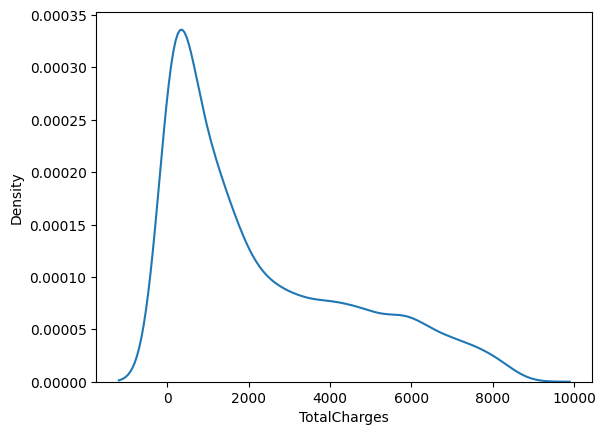

In [278]:
# totlacharges distribution
sns.distplot(x_train['TotalCharges'],hist=False)
plt.show()

In [279]:
# filling nan with median
median = x_train['TotalCharges'].median()
x_train['TotalCharges'].fillna(median, inplace=True)

In [280]:
x_train['TotalCharges'].isna().sum()

0

In [281]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 6754 to 6750
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

In [282]:
numerical_features = [ 'tenure' , 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner' ,'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod']

In [283]:
# check unique values for categorical features
for i in categorical_features:
  print(f'{i} : {x_train[i].unique()}')

gender : ['Male' 'Female']
Partner : ['No' 'Yes']
Dependents : ['Yes' 'No']
PhoneService : ['Yes' 'No']
MultipleLines : ['Yes' 'No' 'No phone service']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['Yes' 'No' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Two year' 'Month-to-month' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Bank transfer (automatic)' 'Electronic check' 'Mailed check'
 'Credit card (automatic)']


### checking outliers


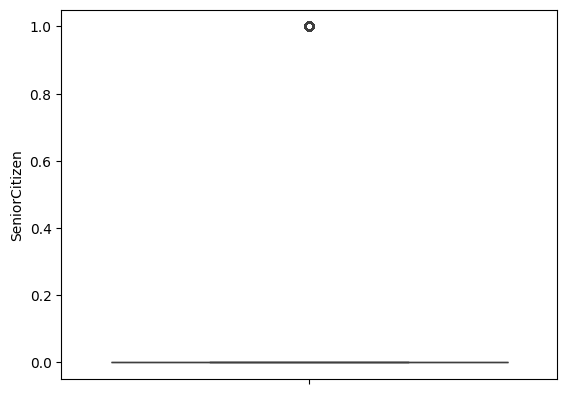

In [284]:
sns.boxplot(x_train['SeniorCitizen'])
plt.show()

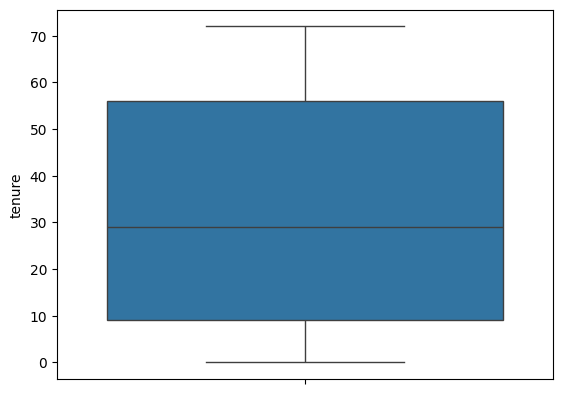

In [285]:
sns.boxplot(x_train['tenure'])
plt.show()

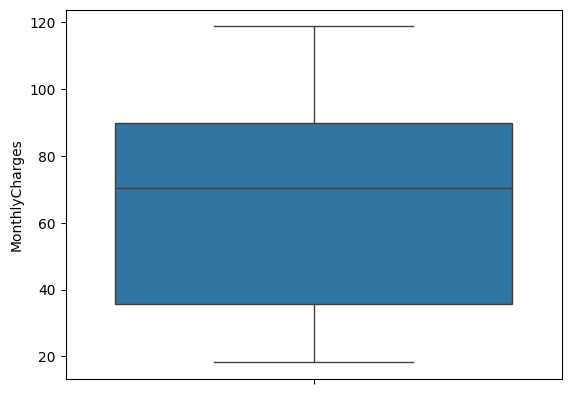

In [286]:
sns.boxplot(x_train['MonthlyCharges'])
plt.show()

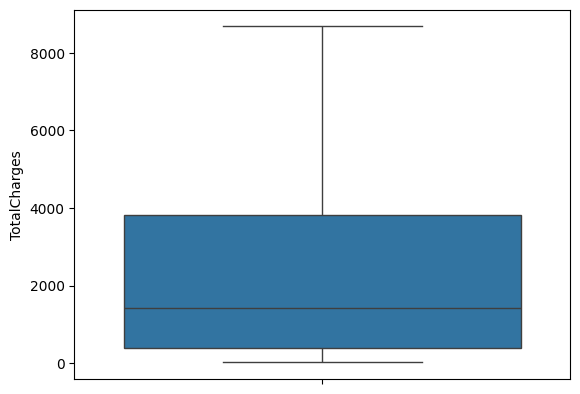

In [287]:
sns.boxplot(x_train['TotalCharges'])
plt.show()

### scaling training data

In [288]:
scaler = MinMaxScaler()

In [289]:
x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])

In [290]:
x_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6754,2775-SEFEE,Male,0,No,Yes,0.000000,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0.434978,0.161089
2324,2774-LVQUS,Female,1,Yes,No,0.208333,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,0.645740,0.143030
5029,1848-LBZHY,Female,0,Yes,No,0.097222,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0.319382,0.038807
7014,9053-EJUNL,Male,0,No,No,0.569444,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0.707025,0.418526
1222,9091-WTUUY,Male,0,Yes,Yes,0.888889,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,No,Mailed check,0.508221,0.511072


### encoding categorical training data

In [291]:
x_train = pd.get_dummies(x_train,columns=categorical_features,drop_first=True)

In [292]:
x_train.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6754,2775-SEFEE,0,0.000000,0.434978,0.161089,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
2324,2774-LVQUS,1,0.208333,0.645740,0.143030,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5029,1848-LBZHY,0,0.097222,0.319382,0.038807,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7014,9053-EJUNL,0,0.569444,0.707025,0.418526,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1222,9091-WTUUY,0,0.888889,0.508221,0.511072,1,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [293]:
x_train.drop('customerID' , axis=1 , inplace= True)

## preprocessing test data

In [294]:
# convert TatalCharges  column to numeric
x_test['TotalCharges'].dtype

dtype('O')

In [295]:
x_test['TotalCharges'] = pd.to_numeric(x_test['TotalCharges'], errors='coerce')

In [296]:
x_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [297]:
# filling the null value with median of the trainging data
x_test['TotalCharges'].fillna(median , inplace = True)

<ipython-input-298-9efce87b8747>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test['TotalCharges'], hist=False)


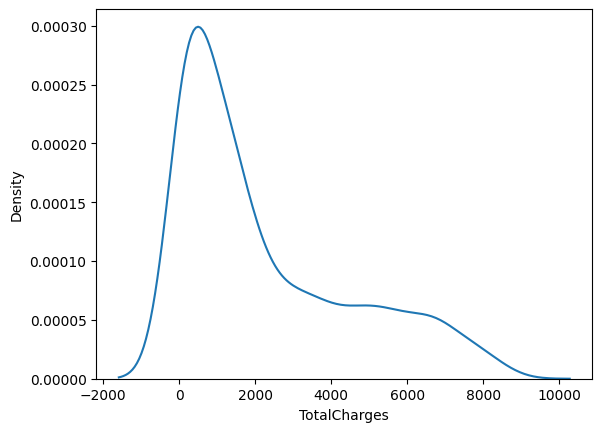

In [298]:
# check ditribution
sns.distplot(x_test['TotalCharges'], hist=False)
plt.show()

### scaling test data

In [299]:
x_test[numerical_features] = scaler.transform(x_test[numerical_features])

In [300]:
x_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2805,9372-TXXPS,Female,0,Yes,No,0.833333,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),0.414549,0.399798
1551,6518-KZXCB,Male,0,No,No,0.305556,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.069756,0.063201
1686,6839-ITVZJ,Female,0,Yes,Yes,0.361111,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,0.416542,0.184324
1994,8022-BECSI,Male,0,No,No,0.305556,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0.013453,0.046584
2353,2789-HQBOU,Male,0,No,No,0.041667,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.618834,0.027117


In [301]:
x_test.drop('customerID', axis=1, inplace=True)

### encoding test data

In [302]:
x_test = pd.get_dummies(x_test ,columns= categorical_features ,drop_first= True)

In [303]:
x_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2805,0,0.833333,0.414549,0.399798,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1551,0,0.305556,0.069756,0.063201,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
1686,0,0.361111,0.416542,0.184324,0,1,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1994,0,0.305556,0.013453,0.046584,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
2353,0,0.041667,0.618834,0.027117,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


## feature selection (SelectKbest)

In [304]:
selector = SelectKBest(score_func=f_classif , k=23)

In [305]:
selector.fit(x_train,y_train)

SelectKBest(k=23)

In [306]:
selector.scores_

array([1.27776136e+02, 8.11975174e+02, 2.18680429e+02, 2.40692398e+02,
       2.09416867e-01, 1.26278117e+02, 1.48283018e+02, 3.76721743e-01,
       3.76721743e-01, 7.00850214e+00, 5.77620459e+02, 3.05306025e+02,
       3.05306025e+02, 1.69420427e+02, 3.05306025e+02, 3.51905152e+01,
       3.05306025e+02, 2.74506891e+01, 3.05306025e+02, 1.58640637e+02,
       3.05306025e+02, 2.86957258e+01, 3.05306025e+02, 2.70173293e+01,
       1.71732928e+02, 5.78810841e+02, 2.16160122e+02, 1.11304384e+02,
       5.73713864e+02, 4.12979250e+01])

In [307]:
indices = selector.get_support()

In [308]:
pd.DataFrame({'Feature': x_train.columns, 'Scores': selector.scores_}).sort_values(by='Scores' , ascending = False)

,Feature,Scores
1,tenure,811.975174
25,Contract_Two year,578.810841
10,InternetService_Fiber optic,577.620459
28,PaymentMethod_Electronic check,573.713864
22,StreamingMovies_No internet service,305.306025
18,TechSupport_No internet service,305.306025
16,DeviceProtection_No internet service,305.306025
14,OnlineBackup_No internet service,305.306025
12,OnlineSecurity_No internet service,305.306025
11,InternetService_No,305.306025


In [309]:
x_train_best = selector.transform(x_train)
x_test_best = selector.transform(x_test)

## DecisionTree classifier

In [163]:
dt = DecisionTreeClassifier()

In [164]:
param_grid = {'ccp_alpha': [0.0, 0.01, 0.1, 0.2]}  # Test different values of ccp_alpha
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train_best, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 0.2]})

In [165]:
best_ccp_alpha = grid_search.best_params_['ccp_alpha']

In [166]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)

In [167]:
pruned_tree.fit(x_train_best,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [168]:
pruned_tree.predict(x_train_best)

array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [169]:
dt_train_acc = accuracy_score(y_train , pruned_tree.predict(x_train_best))
dt_train_acc

0.7912673056443025

In [170]:
dt_test_acc = accuracy_score(y_test , pruned_tree.predict(x_test_best))
dt_test_acc

0.7863733144073811

## Random Forest

In [171]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}


In [172]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)


In [173]:
grid_search.fit(x_train_best, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [174]:
best_params = grid_search.best_params_


In [175]:
best_model = RandomForestClassifier(oob_score=True,**best_params, random_state=42)

In [176]:
best_model.fit(x_train_best,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, oob_score=True,
                       random_state=42)

In [177]:
best_model.oob_score_

0.8010294639687611

In [178]:
print(f'random forest train accuracy {accuracy_score(y_train , best_model.predict(x_train_best))}')
rf_train_acc = accuracy_score(y_train , best_model.predict(x_train_best))

random forest train accuracy 0.836528221512247


In [179]:
print(f'random forest train accuracy {accuracy_score(y_test , best_model.predict(x_test_best))}')
rf_test_acc = accuracy_score(y_test , best_model.predict(x_test_best))

random forest train accuracy 0.8019872249822569


## AdaBoost classifier


In [180]:
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [181]:
grid_search = GridSearchCV(AdaBoostClassifier(),adaboost_param_grid,cv=5)

In [182]:
grid_search.fit(x_train_best,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]})

In [183]:
best_params = grid_search.best_params_

In [184]:
adaboost = AdaBoostClassifier(estimator = DecisionTreeClassifier(),**best_params)

In [185]:
adaboost.fit(x_train_best,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.2,
                   n_estimators=100)

In [186]:
adaboost.predict(x_train_best)


array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [187]:
adaboost_train_acc = accuracy_score(y_train,adaboost.predict(x_train_best))
adaboost_train_acc

0.997515086971956

In [188]:
adaboost.predict(x_test_best)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [189]:
adaboost_test_acc = accuracy_score(y_test,adaboost.predict(x_test_best))
adaboost_test_acc

0.7331440738112136

## GradientBoostClassifier

In [190]:
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [191]:
# Perform grid search for Gradient Boosting Classifier
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5)
gb_grid_search.fit(x_train_best,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [192]:
best_params = gb_grid_search.best_params_

In [193]:
gb = GradientBoostingClassifier(**best_params)

In [194]:
gb.fit(x_train_best,y_train)

GradientBoostingClassifier(n_estimators=50)

In [195]:
gb_train_acc = accuracy_score(y_train,gb.predict(x_train_best))
gb_train_acc

0.8138090166844161

In [196]:
gb_test_acc = accuracy_score(y_test,gb.predict(x_test_best))
gb_test_acc

0.8069552874378992

##XGBoosting

In [197]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [198]:
xgb_grid = GridSearchCV(XGBClassifier(),xgb_param_grid,cv=5)
encoder = LabelEncoder()
xgb_grid.fit(x_train_best,encoder.fit_transform(y_train))

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [199]:
best_params = xgb_grid.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

In [200]:
xgb = XGBClassifier(**best_params)

In [201]:
xgb.fit(x_train_best,encoder.transform(y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [202]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [203]:
train_predicts = xgb.predict(x_train_best)
train_predicts

array([0, 1, 0, ..., 1, 0, 0])

In [204]:
encoded_y_train = encoder.transform(y_train)

In [205]:
xgb_train_acc = accuracy_score(encoded_y_train,train_predicts)
xgb_train_acc

0.8173588924387647

In [206]:
test_predicts = xgb.predict(x_test_best)
test_predicts

array([0, 0, 0, ..., 0, 0, 0])

In [207]:
encoded_y_test = encoder.transform(y_test)

In [208]:
xgb_test_acc = accuracy_score(encoded_y_test,test_predicts)
xgb_test_acc

0.8076650106458482

## KNN


In [209]:
K = int(np.sqrt(df.shape[0]))
K

83

In [210]:
knn = KNeighborsClassifier(K,metric='euclidean')

In [211]:
knn.fit(x_train_best,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=83)

In [212]:
knn_train_acc = accuracy_score(y_train,knn.predict(x_train_best))
print('knn train accuracy: ', knn_train_acc)

knn train accuracy:  0.7999645012424565


In [213]:
knn_predicts = knn.predict(x_test_best)

In [214]:
knn_test_acc = accuracy_score(y_test,knn_predicts)
print('knn test accuracy', knn_test_acc)

knn test accuracy 0.7955997161107168


## GaussianNB

In [313]:
gnb = GaussianNB()

In [314]:
gnb.fit(x_train,y_train)

GaussianNB()

In [315]:
gnb_train_acc = accuracy_score(y_train,gnb.predict(x_train))
gnb_train_acc

0.65814696485623

In [316]:
gnb_test_acc = accuracy_score(y_test,gnb.predict(x_test))
gnb_test_acc

0.6678495386799148

## MultinomailNB

In [311]:
mnb = MultinomialNB()

In [312]:
mnb.fit(x_train_best,y_train)

MultinomialNB()

In [318]:
mnb_train_acc = accuracy_score(y_train,mnb.predict(x_train_best))
print('multinomial naive bayes train acc:',mnb_train_acc)

multinomial naive bayes train acc: 0.7341143059992901


In [320]:
mnb_test_acc = accuracy_score(y_test,mnb.predict(x_test_best))
print('multinomial naive bayes test acc:',mnb_test_acc)

multinomial naive bayes test acc: 0.7388218594748048


## comparing models accuracies

In [321]:
df_acc = pd.DataFrame({'model':['pruned DecisionTree','Random Forest','AdaBoost','GradientBoost','XGBoost','KNN', 'GaussainNB','MultinomialNB'],
                       'Train accuracy':[dt_train_acc, rf_train_acc, adaboost_train_acc, gb_train_acc,xgb_train_acc, knn_train_acc,gnb_train_acc ,mnb_train_acc],
                       'Test accuracy':[dt_test_acc, rf_test_acc, adaboost_test_acc, gb_test_acc, xgb_test_acc,knn_test_acc , gnb_test_acc,mnb_test_acc]})

In [322]:
df_acc.sort_values('Test accuracy',ascending=False)

,model,Train accuracy,Test accuracy
4,XGBoost,0.817359,0.807665
3,GradientBoost,0.813809,0.806955
1,Random Forest,0.836528,0.801987
5,KNN,0.799965,0.795600
0,pruned DecisionTree,0.791267,0.786373
7,MultinomialNB,0.734114,0.738822
2,AdaBoost,0.997515,0.733144
6,GaussainNB,0.658147,0.667850
